In [1]:
import pandas as pd
import os
import numpy as np
import ast
import json
import itertools
import matplotlib.pyplot as plt
file='/media/gehme-gpu2/gehme-gpu2/projects/2020_gcs_with_ml/data/cme_seg_20250320/20250320_Set_Parameters.csv'
file='/data1/Descargas/20250320_Set_Parameters.csv'

In [2]:
df = pd.read_csv(file)#, delimiter = ',')


In [6]:
df.shape

(50000, 32)

In [4]:
df.keys()

Index(['Unnamed: 0.1', 'Unnamed: 0', 'CMElon', 'CMElat', 'CMEtilt', 'height',
       'k', 'ang', 'level_cme', 'satpos', 'plotranges', 'mask AW', 'apex',
       'scl_fac_fr', 'def_fac_lon_lat_tilt', 'exp_fac_k_ang', 'aspect ratio',
       'median_btot_over_back', 'filter_area_threshold',
       'sinthetic_params_Bt_out', 'sinthetic_params_Bt_RD',
       'sinthetic_params_FR_out', 'sinthetic_params_FR_RD', 'stats_btot_mask',
       'stats_back_mask', 'stats_cme_mask', 'stats_btot_mask_outer',
       'stats_back_mask_outer', 'stats_cme_mask_outer', 'folder_name', 'row'],
      dtype='object')

In [5]:
instrument_values = ['sta', 'stb', 'c2']
# Add the new column 'instrument' and assign the list to all rows
df['instrument'] = [instrument_values] * len(df)

In [7]:
keys=df.keys()
df2 = df.copy()
for i,j in enumerate(keys):
    aux_list = []
    for index, value in df[j].items():
        #print(index, value)
        if not isinstance(value, str):
            aux_list.append(value)
        if isinstance(value, str):
            try:
                #if i >16:
                #    print(i,index,value)
                aux = ast.literal_eval(value)
                aux_list.append(aux)
            except:
                value = value.replace('nan', 'null')
                lst = json.loads(value)
                value = [-666 if x is None else x for x in lst]
                aux_list.append(value)
    df2[j] = aux_list

In [8]:
def unpack_dataframe_with_scalars(df, scalar_cols):
    """
    Unpacks a DataFrame where some columns contain lists of integers
    and others contain scalar values, copying the scalar values to the unpacked rows.

    Args:
        df (pd.DataFrame): The input DataFrame.
        scalar_cols (list): A list of column names that contain scalar values.

    Returns:
        pd.DataFrame: A new DataFrame with unpacked values.
    """
    new_data = {}
    n_rows_original = len(df)

    for col in df.columns:
        if col in scalar_cols:
            original_values = df[col].tolist()
            repeated_values = [val for val in original_values for _ in range(3)]
            new_data[col] = repeated_values
        else:
            unpacked_col = list(itertools.chain.from_iterable(df[col]))
            new_data[col] = unpacked_col

    new_df = pd.DataFrame(new_data)
    return new_df

In [10]:
scalar_list = df2.columns[0:9].tolist()
scalar_list.append('row')
scalar_list

['Unnamed: 0.1',
 'Unnamed: 0',
 'CMElon',
 'CMElat',
 'CMEtilt',
 'height',
 'k',
 'ang',
 'level_cme',
 'row']

In [11]:
unpacked_df = unpack_dataframe_with_scalars(df2, scalar_list)

In [12]:
unpacked_df.shape

(150000, 32)

In [13]:
value_to_remove = -666
folder_column_name = 'folder_name'
filtered_unpacked_df = unpacked_df[unpacked_df[folder_column_name] != value_to_remove]

In [14]:
filtered_unpacked_df.shape

(116546, 32)

In [17]:
def plot_scalar_histogram(df, scalar_column_name, num_bins=20, title=None, xlabel=None, ylabel='Frequency', figsize=(10, 6)):
    """
    Generates and displays a histogram for a specified scalar column in a pandas DataFrame.

    Args:
        df (pd.DataFrame): The input pandas DataFrame.
        scalar_column_name (str): The name of the column containing scalar data to plot.
        num_bins (int, optional): The number of bins in the histogram. Defaults to 20.
        title (str, optional): The title of the histogram. If None, a default title is generated. Defaults to None.
        xlabel (str, optional): The label for the x-axis. If None, the scalar_column_name is used. Defaults to None.
        ylabel (str, optional): The label for the y-axis. Defaults to 'Frequency'.
        figsize (tuple, optional): The size of the plot (width, height) in inches. Defaults to (10, 6).
    """
    if scalar_column_name not in df.columns:
        print(f"Error: The column '{scalar_column_name}' does not exist in the DataFrame.")
        return

    scalar_data = df[scalar_column_name]

    plt.figure(figsize=figsize)
    scalar_data.hist(bins=num_bins, edgecolor='black',density=True, alpha=0.7)

    if title is None:
        title = f'Histogram of {scalar_column_name}'
    plt.title(title)

    if xlabel is None:
        xlabel = scalar_column_name
    plt.xlabel(xlabel)

    plt.ylabel(ylabel)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

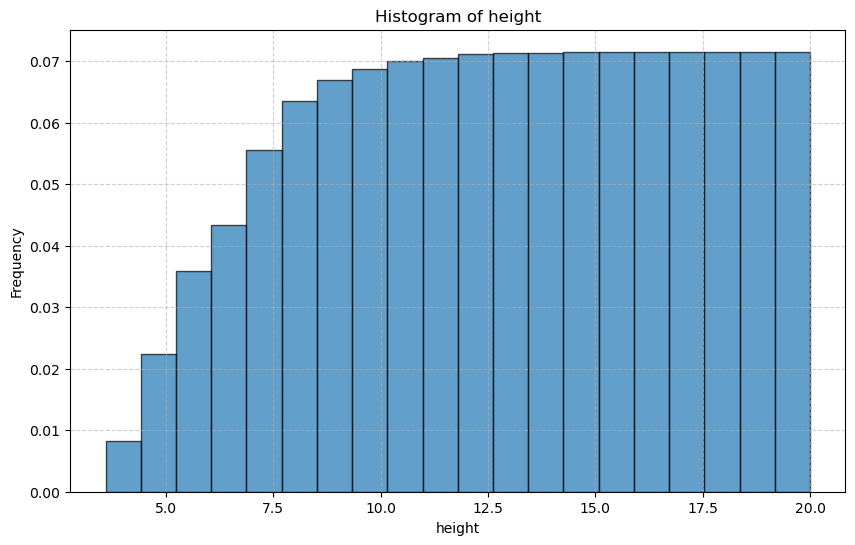

In [18]:
scalar_column_name = 'height'
plot_scalar_histogram(filtered_unpacked_df, scalar_column_name)

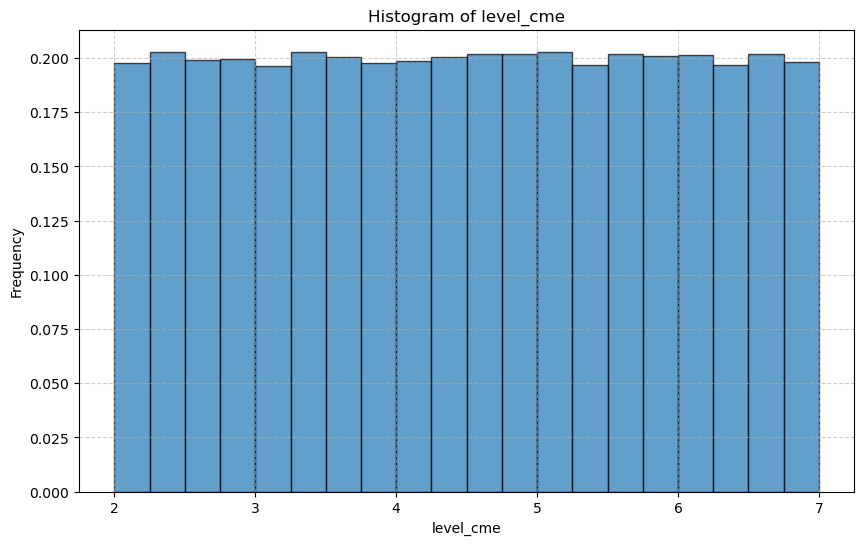

In [19]:
scalar_column_name = 'level_cme'
plot_scalar_histogram(filtered_unpacked_df, scalar_column_name)

In [20]:
df2.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'CMElon', 'CMElat', 'CMEtilt', 'height',
       'k', 'ang', 'level_cme', 'satpos', 'plotranges', 'mask AW', 'apex',
       'scl_fac_fr', 'def_fac_lon_lat_tilt', 'exp_fac_k_ang', 'aspect ratio',
       'median_btot_over_back', 'filter_area_threshold',
       'sinthetic_params_Bt_out', 'sinthetic_params_Bt_RD',
       'sinthetic_params_FR_out', 'sinthetic_params_FR_RD', 'stats_btot_mask',
       'stats_back_mask', 'stats_cme_mask', 'stats_btot_mask_outer',
       'stats_back_mask_outer', 'stats_cme_mask_outer', 'folder_name', 'row',
       'instrument'],
      dtype='object')

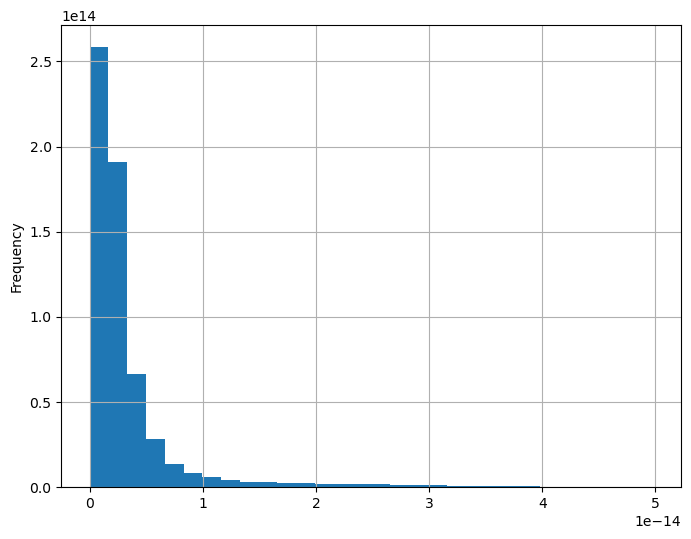

In [21]:
element_3=filtered_unpacked_df['stats_back_mask'].apply(lambda x: x[2])

minimum_scalar = 0
maximum_scalar = 0.5e-13
filtered_element_3 = element_3[(element_3 >= minimum_scalar) & (element_3 <= maximum_scalar)]

plt.figure(figsize=(8, 6))
filtered_element_3.hist(bins=30, density=True)
plt.title('')
plt.xlabel('')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [72]:
np.max(filtered_element_3)

2.3340438e-09

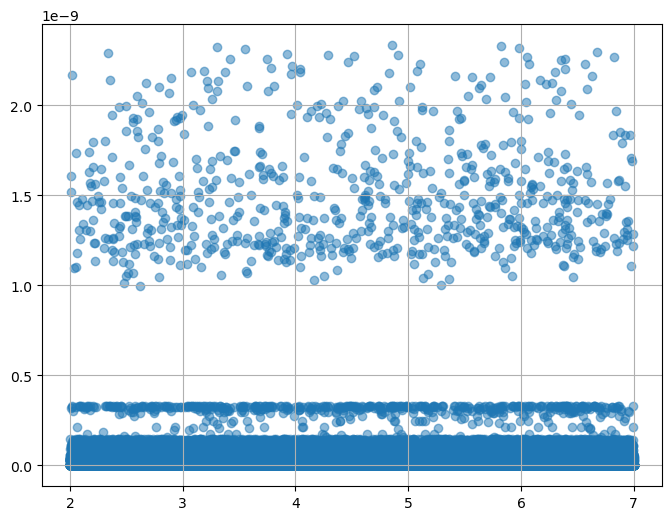

In [22]:
#separar en color segun stereo a b y lasco
element_x = filtered_unpacked_df['stats_back_mask'].apply(lambda x: x[2])
element_y = filtered_unpacked_df['level_cme']
plt.figure(figsize=(8, 6))
plt.scatter(element_y, element_x, alpha=0.5)
plt.grid(True) 
plt.show()

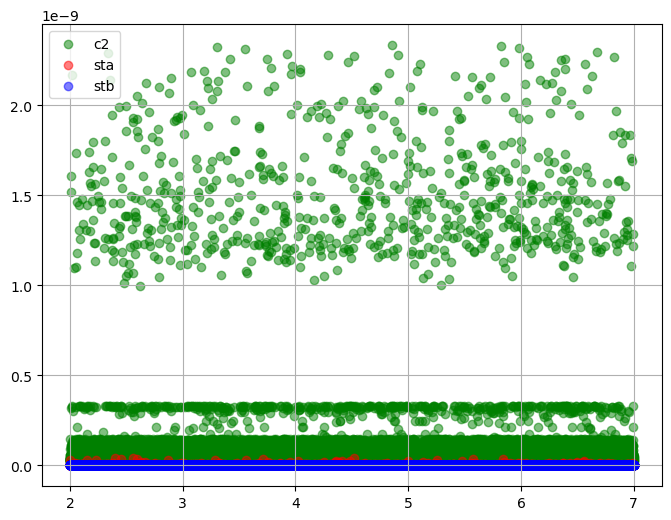

In [32]:
color1 = 'red'
color2 = 'blue'
color3 = 'green'

index1 = filtered_unpacked_df['instrument'] == 'sta'
index2 = filtered_unpacked_df['instrument'] == 'stb'
index3 = filtered_unpacked_df['instrument'] == 'c2'

element_x1 = filtered_unpacked_df['stats_back_mask'][index1].apply(lambda x: x[2])
element_y1 = filtered_unpacked_df['level_cme'][index1]
element_x2 = filtered_unpacked_df['stats_back_mask'][index2].apply(lambda x: x[2])
element_y2 = filtered_unpacked_df['level_cme'][index2]
element_x3 = filtered_unpacked_df['stats_back_mask'][index3].apply(lambda x: x[2])
element_y3 = filtered_unpacked_df['level_cme'][index3]
plt.figure(figsize=(8, 6))
plt.scatter(element_y3, element_x3, alpha=0.5, color=color3, label='c2')
plt.scatter(element_y1, element_x1, alpha=0.5, color=color1, label='sta')
plt.scatter(element_y2, element_x2, alpha=0.5, color=color2, label='stb')
plt.legend()
plt.grid(True) 
plt.show()

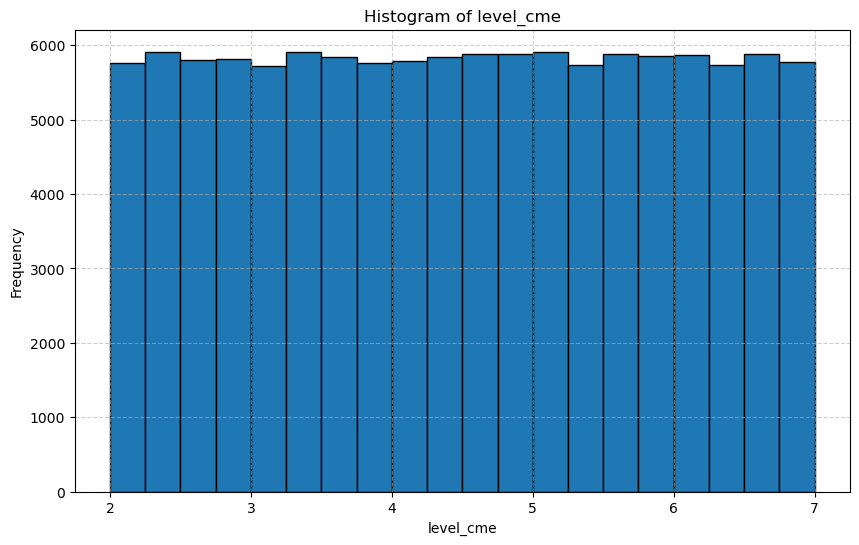

In [61]:
scalar_column_name = 'level_cme'
plot_scalar_histogram(filtered_unpacked_df, scalar_column_name)

In [24]:
filtered_unpacked_df['filter_area_threshold']

0         [0.3486021505376344, 0.25365591397849463, 0.18...
1         [0.27956682815616984, 0.1738387004844685, 0.11...
2         [0.4180318478634437, 0.26818650475426736, 0.19...
3         [0.2438340807174888, 0.14069506726457398, 0.09...
4         [0.2126032425818293, 0.10125420617925972, 0.06...
                                ...                        
149995    [0.3152534868275404, 0.1686960371928271, 0.110...
149996    [0.19482826687722068, 0.07540465850769838, 0.0...
149997    [0.4075168225832923, 0.29164615132118826, 0.21...
149998    [0.36117616445485295, 0.30080666146239915, 0.2...
149999    [0.48671538829314936, 0.4564578922204767, 0.42...
Name: filter_area_threshold, Length: 116546, dtype: object

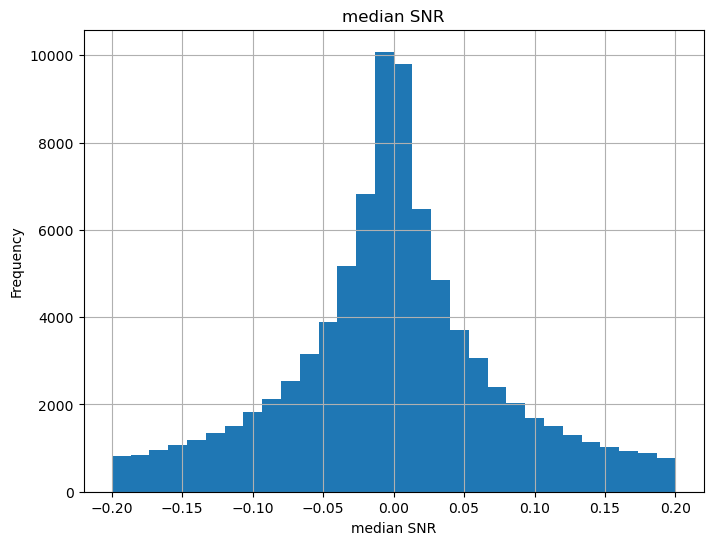

In [49]:
element_3 = filtered_unpacked_df['median_btot_over_back']
minimum_scalar = -0.2
maximum_scalar = 0.2
filtered_element_3 = element_3[(element_3 >= minimum_scalar) & (element_3 <= maximum_scalar)]
plt.figure(figsize=(8, 6))
filtered_element_3.hist(bins=30)
plt.title('median SNR')
plt.xlabel('median SNR')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

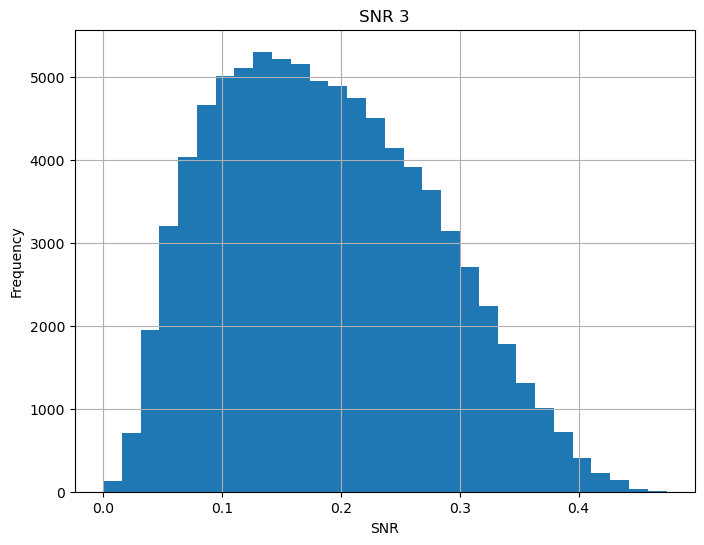

In [56]:
elements = filtered_unpacked_df['median_btot_over_back'].apply(lambda x: np.abs(x))<0.2
element_3 = filtered_unpacked_df['filter_area_threshold'][elements].apply(lambda x: x[1])
plt.figure(figsize=(8, 6))
element_3.hist(bins=30)
plt.title('SNR 3')
plt.xlabel('SNR')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


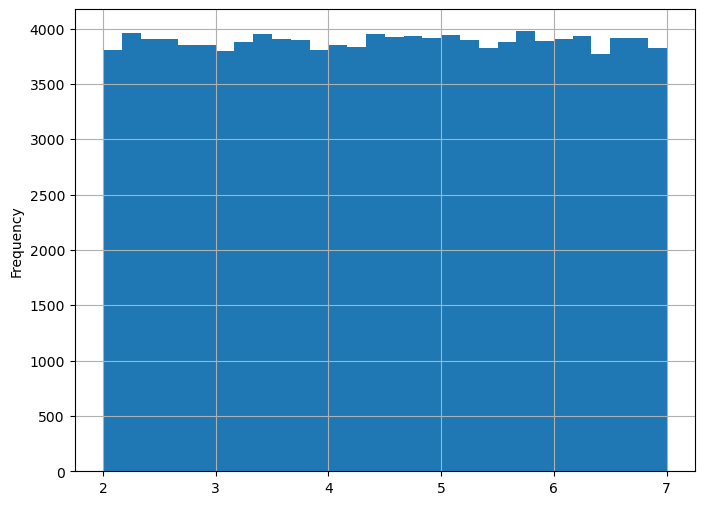

In [62]:
elements_3 = filtered_unpacked_df['level_cme']
plt.figure(figsize=(8, 6))
elements_3.hist(bins=30)
plt.title('')
plt.xlabel('')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

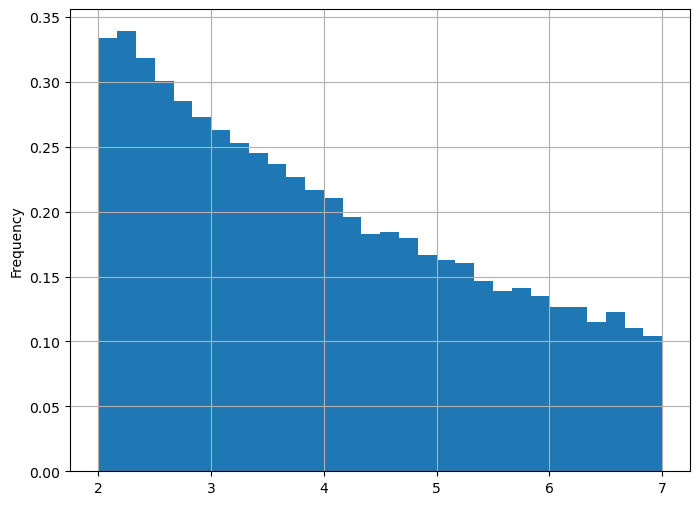

In [64]:
elements = (filtered_unpacked_df['median_btot_over_back'].apply(lambda x: np.abs(x))<0.2) & (filtered_unpacked_df['filter_area_threshold'].apply(lambda x: x[1]) < 0.2)
element_3 = filtered_unpacked_df['level_cme'][elements]#.apply(lambda x: x[1])
plt.figure(figsize=(8, 6))
element_3.hist(bins=30, density=True)
plt.title('')
plt.xlabel('')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


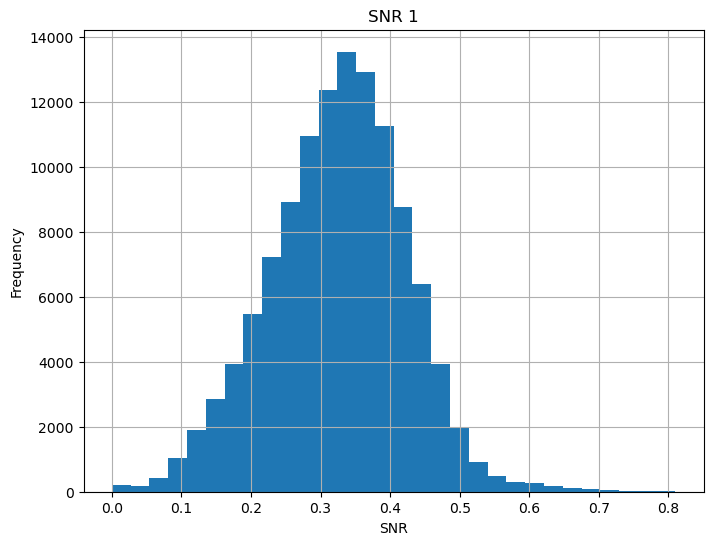

In [40]:
#1,3,5,7,10
element_3 = filtered_unpacked_df['filter_area_threshold'].apply(lambda x: x[0])
plt.figure(figsize=(8, 6))
element_3.hist(bins=30)
plt.title('SNR 1')
plt.xlabel('SNR')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

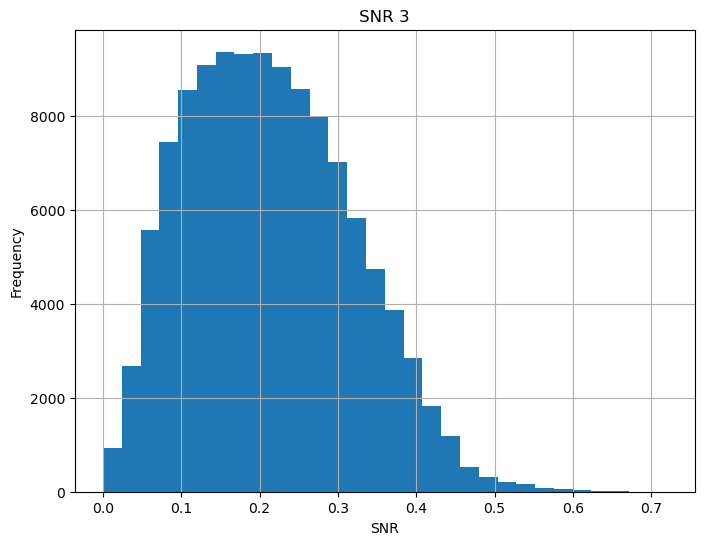

In [41]:
element_3 = filtered_unpacked_df['filter_area_threshold'].apply(lambda x: x[1])
plt.figure(figsize=(8, 6))
element_3.hist(bins=30)
plt.title('SNR 3')
plt.xlabel('SNR')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

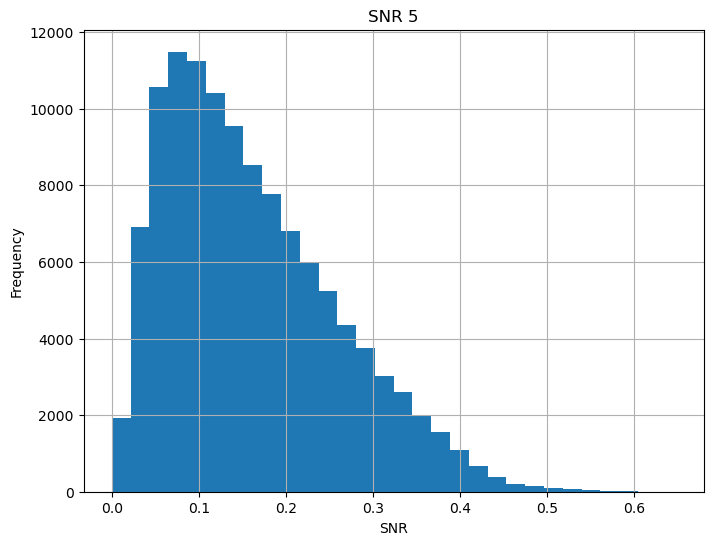

In [42]:
element_3 = filtered_unpacked_df['filter_area_threshold'].apply(lambda x: x[2])
plt.figure(figsize=(8, 6))
element_3.hist(bins=30)
plt.title('SNR 5')
plt.xlabel('SNR')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

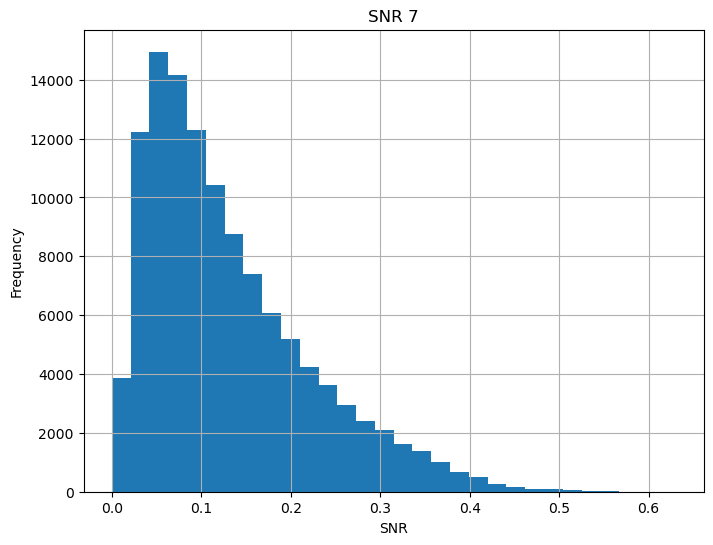

In [43]:
element_3 = filtered_unpacked_df['filter_area_threshold'].apply(lambda x: x[3])
plt.figure(figsize=(8, 6))
element_3.hist(bins=30)
plt.title('SNR 7')
plt.xlabel('SNR')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

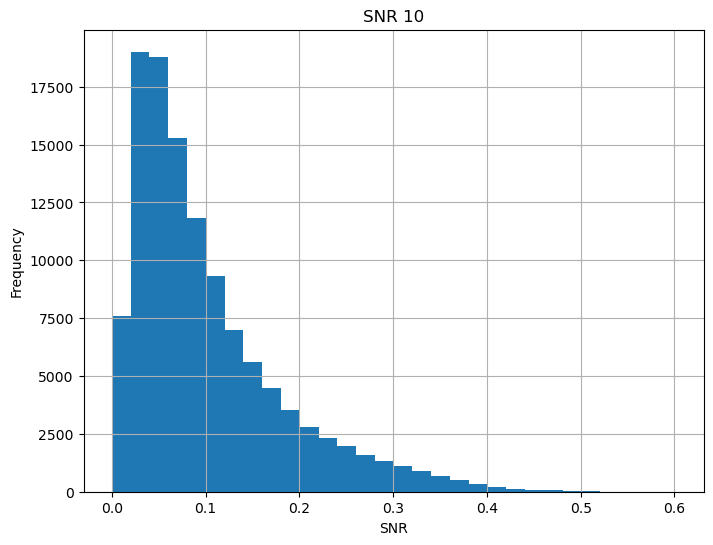

In [44]:
element_3 = filtered_unpacked_df['filter_area_threshold'].apply(lambda x: x[4])
plt.figure(figsize=(8, 6))
element_3.hist(bins=30)
plt.title('SNR 10')
plt.xlabel('SNR')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [46]:
#select index of the column from filtered_unpacked_df in which filtered_unpacked_df['filter_area_threshold'].apply(lambda x: x[1]) less tahn 0.4
index = filtered_unpacked_df['filter_area_threshold'].apply(lambda x: x[1]) < 0.4
#filtered_unpacked_df[index]


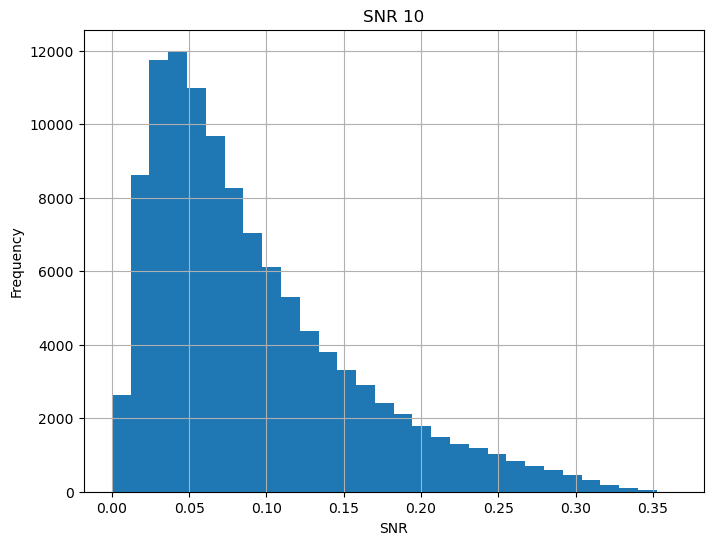

In [47]:
element_3 = filtered_unpacked_df['filter_area_threshold'][index].apply(lambda x: x[4])
plt.figure(figsize=(8, 6))
element_3.hist(bins=30)
plt.title('SNR 10')
plt.xlabel('SNR')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

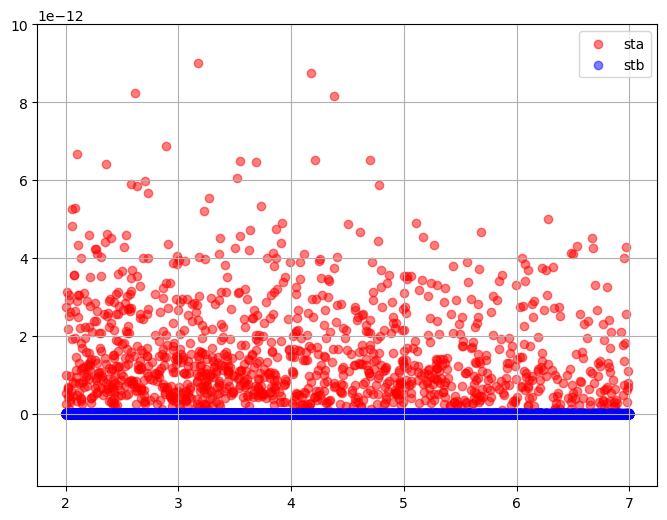

In [38]:
color1 = 'red'
color2 = 'blue'
color3 = 'green'

index1 = (filtered_unpacked_df['median_btot_over_back'].apply(lambda x: np.abs(x))<0.2) & (filtered_unpacked_df['filter_area_threshold'].apply(lambda x: x[1]) < 0.2) & (filtered_unpacked_df['instrument'] == 'sta')
index2 = (filtered_unpacked_df['median_btot_over_back'].apply(lambda x: np.abs(x))<0.2) & (filtered_unpacked_df['filter_area_threshold'].apply(lambda x: x[1]) < 0.2) & (filtered_unpacked_df['instrument'] == 'stb')
index3 = (filtered_unpacked_df['median_btot_over_back'].apply(lambda x: np.abs(x))<0.2) & (filtered_unpacked_df['filter_area_threshold'].apply(lambda x: x[1]) < 0.2) & (filtered_unpacked_df['instrument'] == 'c2')

element_x1 = filtered_unpacked_df['stats_back_mask'][index1].apply(lambda x: x[2])
element_y1 = filtered_unpacked_df['level_cme'][index1]
element_x2 = filtered_unpacked_df['stats_back_mask'][index2].apply(lambda x: x[2])
element_y2 = filtered_unpacked_df['level_cme'][index2]
element_x3 = filtered_unpacked_df['stats_back_mask'][index3].apply(lambda x: x[2])
element_y3 = filtered_unpacked_df['level_cme'][index3]
plt.figure(figsize=(8, 6))
#plt.scatter(element_y3, element_x3, alpha=0.5, color=color3, label='c2')
plt.scatter(element_y1, element_x1, alpha=0.5, color=color1, label='sta')
plt.scatter(element_y2, element_x2, alpha=0.5, color=color2, label='stb')
#plt.ylim(None, 0.5e-9)
plt.ylim(None, 1e-11)
plt.legend()
plt.grid(True) 
plt.show()

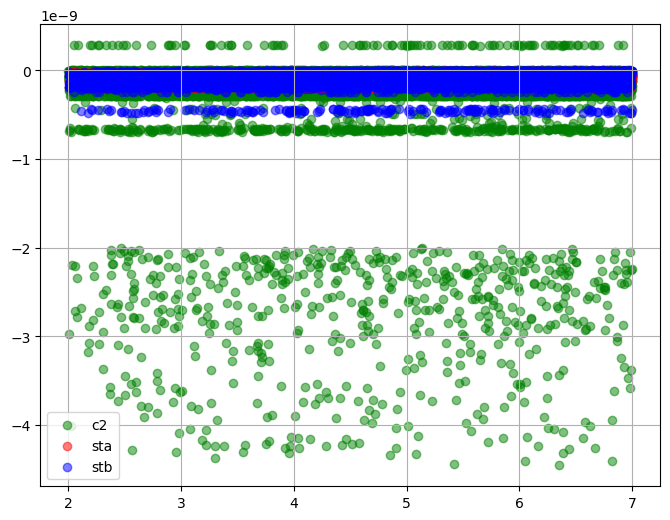

In [41]:
color1 = 'red'
color2 = 'blue'
color3 = 'green'

index1 = (filtered_unpacked_df['median_btot_over_back'].apply(lambda x: np.abs(x))>0.2) & (filtered_unpacked_df['instrument'] == 'sta')
index2 = (filtered_unpacked_df['median_btot_over_back'].apply(lambda x: np.abs(x))>0.2) & (filtered_unpacked_df['instrument'] == 'stb')
index3 = (filtered_unpacked_df['median_btot_over_back'].apply(lambda x: np.abs(x))>0.2) & (filtered_unpacked_df['instrument'] == 'c2')
#stats [mean, median, std, percentil_1, percentil_2]
element_x1 = filtered_unpacked_df['stats_back_mask'][index1].apply(lambda x: x[1])
element_y1 = filtered_unpacked_df['level_cme'][index1]
element_x2 = filtered_unpacked_df['stats_back_mask'][index2].apply(lambda x: x[1])
element_y2 = filtered_unpacked_df['level_cme'][index2]
element_x3 = filtered_unpacked_df['stats_back_mask'][index3].apply(lambda x: x[1])
element_y3 = filtered_unpacked_df['level_cme'][index3]
plt.figure(figsize=(8, 6))
plt.scatter(element_y3, element_x3, alpha=0.5, color=color3, label='c2')
plt.scatter(element_y1, element_x1, alpha=0.5, color=color1, label='sta')
plt.scatter(element_y2, element_x2, alpha=0.5, color=color2, label='stb')
#plt.ylim(None, 0.5e-10)
plt.legend()
plt.grid(True) 
plt.show()

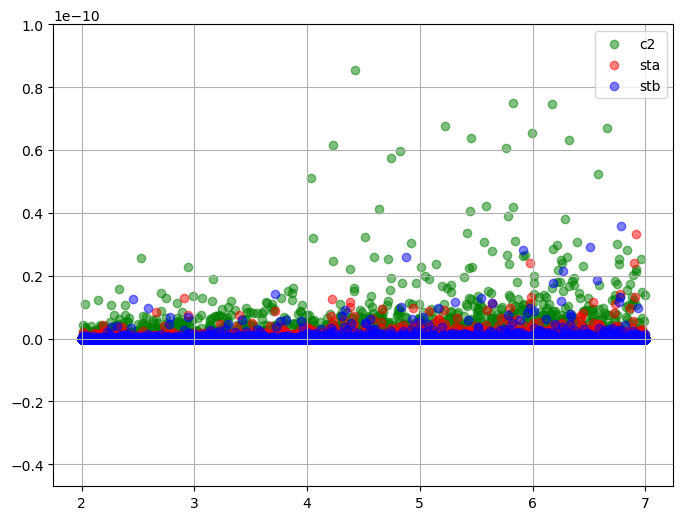

In [49]:
color1 = 'red'
color2 = 'blue'
color3 = 'green'

index1 =  (filtered_unpacked_df['instrument'] == 'sta')
index2 =  (filtered_unpacked_df['instrument'] == 'stb')
index3 =  (filtered_unpacked_df['instrument'] == 'c2')
#stats [mean, median, std, percentil_1, percentil_2]
element_x1 = filtered_unpacked_df['stats_cme_mask_outer'][index1].apply(lambda x: x[2])
element_y1 = filtered_unpacked_df['level_cme'][index1]
element_x2 = filtered_unpacked_df['stats_cme_mask_outer'][index2].apply(lambda x: x[2])
element_y2 = filtered_unpacked_df['level_cme'][index2]
element_x3 = filtered_unpacked_df['stats_cme_mask_outer'][index3].apply(lambda x: x[2])
element_y3 = filtered_unpacked_df['level_cme'][index3]
plt.figure(figsize=(8, 6))
plt.scatter(element_y3, element_x3, alpha=0.5, color=color3, label='c2')
plt.scatter(element_y1, element_x1, alpha=0.5, color=color1, label='sta')
plt.scatter(element_y2, element_x2, alpha=0.5, color=color2, label='stb')
plt.ylim(None,1e-10)
plt.legend()
plt.grid(True) 
plt.show()

In [83]:
instrument_values = ['sta', 'stb', 'c2']
# Add the new column 'instrument' and assign the list to all rows
df['instrument'] = [instrument_values] * len(df)

In [51]:
filtered_unpacked_df.shape

(116546, 32)

In [ ]:
csv_file_path = '/data1/Descargas/20250320_Set_Parameters_unpacked_filteres_DS31.csv'
filtered_unpacked_df.to_csv(csv_file_path)

In [53]:
df_read_test = pd.read_csv(csv_file_path)

In [58]:
df_read_test.columns


Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'CMElon', 'CMElat',
       'CMEtilt', 'height', 'k', 'ang', 'level_cme', 'satpos', 'plotranges',
       'mask AW', 'apex', 'scl_fac_fr', 'def_fac_lon_lat_tilt',
       'exp_fac_k_ang', 'aspect ratio', 'median_btot_over_back',
       'filter_area_threshold', 'sinthetic_params_Bt_out',
       'sinthetic_params_Bt_RD', 'sinthetic_params_FR_out',
       'sinthetic_params_FR_RD', 'stats_btot_mask', 'stats_back_mask',
       'stats_cme_mask', 'stats_btot_mask_outer', 'stats_back_mask_outer',
       'stats_cme_mask_outer', 'folder_name', 'row', 'instrument'],
      dtype='object')

In [67]:
type(df_read_test['filter_area_threshold'][8])

str

In [72]:
keys=df_read_test.keys()
df_read_test_2 = df_read_test.copy()
for i,j in enumerate(keys):
    aux_list = []
    for index, value in df_read_test[j].items():
        #print(index, value)
        if not isinstance(value, str):
            aux_list.append(value)
        if isinstance(value, str) and j!= 'instrument':
            try:
                #if i >16:
                #    print(i,index,value)
                aux = ast.literal_eval(value)
                aux_list.append(aux)
            except:
                value = value.replace('nan', 'null')
                #value = value.replace('', 'null')
                print(index, j,value)
                lst = json.loads(value)
                value = [-666 if x is None else x for x in lst]
                aux_list.append(value)
        if j == 'instrument':
            aux_list.append(value)
    df_read_test_2[j] = aux_list

In [83]:
path='/dir/casd/'
asd = [path+str(name) for name in df_read_test_2['folder_name']]
asd[4]

'/dir/casd/4'